# 분류 (classification)

+ 머신러닝에서 회귀(regression)과 함께 가장 기본적인 데이타 분석 방법
+ 분류는 데이타가 어느 범주(category)에 해당하는지 판단하는 것이다.


## [1]이항 분류

+ 정답의 범주가 두 개인 분류 문제
+ ex) 와인의 상태에 따라 레드와인인지 화이트 와인인지 구별

               
<table>
<tr><th>속성</th><th>설명</th></tr>
<tr><td>fixed acidity</td><td>주석산(Tartaric acid)</td></tr>
<tr><td>volatile acidity</td><td>초산(Acetic acid)</td></tr>
<tr><td>citric acid</td><td>구연산</td></tr>
<tr><td>residual sugar</td><td>당도</td></tr>
<tr><td>chlorides</td><td>영화물(소금)</td></tr>
<tr><td>free sulfur dioxide</td><td>자유 이산화황(산화방지제, 방부제 역할)</td></tr>
<tr><td>total sulfur dioxide</td><td>총 이산화황</td></tr>
<tr><td>density</td><td>밀도</td></tr>
<tr><td>pH</td><td>산도</td></tr>
<tr><td>sulphates</td><td>황산칼륨</td></tr>
<tr><td>alcohol</td><td>알코올 도수</td></tr>
<tr><td>quality</td><td>품질(0~10)</td></tr>
<tr><td>type</td><td>종류(레드:1 , 화이트:0)</td></tr>
</table>

In [1]:
#!pip install pandas

In [2]:
# (1-1) 와인 데이터셋 불러오기
import pandas as pd
wine = pd.read_csv('./dataset/wine.csv', header=None)
wine.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
               'total sulfur dioxide','density','pH','sulphates','alcohol','quality',
               'type']
print(wine.shape)
wine.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


0    4898
1    1599
Name: type, dtype: int64


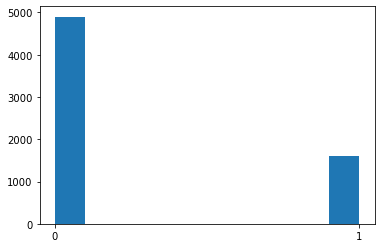

In [3]:
# [확인] 레드 와인과 화이트 와인 데이타 비율 확인

# type 속성의 값을 수로 확인
print(wine['type'].value_counts())

# type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

In [4]:
# [확인] 데이터 요약 정보 확인
#     외부에서 불러온 데이터의 경우 어떤 값으로 구성되어 있는지 확인하고 데이타를 섞고 정규화를 해야 한다.
#     정규화 과정에서 데이터에 숫자가 아닌 값이 들어가며 에러을 유발한다.
#     모두 숫자형에 non-null 로 null가 존재하지 않음을 확인하다.

print(wine.info())
wine.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
# (1-2) 데이터 정규화

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

print(wine_norm.describe())
# 결과를 확인하면 min은 0이고 max는 1로 모두 0~1 사이의 데이타로 정규화가 된 것이다.

wine_norm.head()



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.282257          0.173111     0.191948        0.074283   
std         0.107143          0.109758     0.087541        0.072972   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.214876          0.100000     0.150602        0.018405   
50%         0.264463          0.140000     0.186747        0.036810   
75%         0.322314          0.213333     0.234940        0.115031   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.078129             0.102518              0.252868     0.146262   
std       0.058195             0.061630              0.130235     0.057811   
min       0.000000             0.000000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0


In [6]:
# (1-3) 데이터 섞은 후 numpy array로 변환
#       df.sample(frac) : 전체 데이타프레임에서 frac 인수로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이타프레임을 만듬
#       frac=1 : 100% 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과이다.

import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
display(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
display(wine_np[:5])

# 첫번째 출력 결과에서  type을 보면 원래는 레드와인이 앞에 있어서 0.0만 나와야하지만 섞여서 나온다.

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6390       0.239669          0.146667     0.301205        0.176380   0.059801   
3559       0.388430          0.060000     0.186747        0.006135   0.024917   
295        0.578512          0.280000     0.277108        0.029141   0.106312   
2838       0.537190          0.113333     0.289157        0.024540   0.054817   
2571       0.247934          0.093333     0.210843        0.259202   0.049834   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
6390             0.128472              0.278802  0.198381  0.248062   
3559             0.041667              0.195853  0.113553  0.054264   
295              0.013889              0.048387  0.250434  0.255814   
2838             0.093750              0.364055  0.209948  0.364341   
2571             0.128472              0.338710  0.236939  0.403101   

      sulphates   alcohol   quality  type  
6390   0.174157  0.130435  0.500000   0.0 

In [7]:
# (1-4) train 데이터와 test 데이터로 분리
#         훈련 데이타 80% + 테스트 데이타 20%
#         기존 12개의 속성은 X가 되고 마지막에 새롭게 추가한 속성은 Y가 된다.
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

# tf.keras.utils.to_categorical : 정답 행렬을 one-hot encoding 방식으로 바꾼다
# one-hot encoding : 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지 인덱스는 모두 0으로 넣는 방식
# num_classes : 정답 클래스의 갯수
# 정답이 레드 와인(0.0)이라면 [1. 0.]이 되고 화이트 와인(1.0)이라면 [0. 1.]이 된다.
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.23966942 0.14666667 0.30120482 0.17638037 0.05980066 0.12847222
 0.27880184 0.19838057 0.24806202 0.1741573  0.13043478 0.5       ]
0.0
[0.29752066 0.21333333 0.24698795 0.20705521 0.0730897  0.125
 0.43317972 0.22652786 0.37209302 0.23033708 0.20289855 0.5       ]
0.0
[1. 0.]
[1. 0.]


In [8]:
# (2) 와인 데이터셋 분류 모델 생성하고 실행
#     회귀 모델과 비슷해 보이지만 마지막 레이어의 활성화 함수가 softmax이다.
#     마지막 레이어의 뉴런의 갯수가 2개인 것은 원-핫 인코딩으로 변환한 정답의 차원 수와 동일하다.
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# loss에 주로 사용하던 mse 대신 categorical_crossentropy 지정
# metrics=['accuracy'] : 분류 문제는 정확도(accuracy)로 퍼포먼스를 측정하기 때문에 정확도를 설정하는 것이 필수이다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


C:\Users\simmi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[참고] [ 크로스 엔트로피(cross entropy) ](https://wordbe.tistory.com/entry/ML-Cross-entropyCategorical-Binary%EC%9D%98-%EC%9D%B4%ED%95%B4)

[참고] [ softmax 간단한 이해 ](https://m.blog.naver.com/wideeyed/221021710286)

In [9]:
# (3) 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9487 - val_loss: 0.0488 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9736 - val_loss: 0.0647 - val_accuracy: 0.9808
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.9841 - val_loss: 0.0182 - val_accuracy: 0.9931
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9887 - val_loss: 0.0560 - val_accuracy: 0.9731
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9872 - val_loss: 0.0365 - val_accuracy: 0.9923
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9902 - val_loss: 0.0197 - val_accuracy: 0.9954
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9818 - val_loss: 0.0198 - val_accuracy: 0.9954
Epoch 

[결과] 정확도가 100% 가까운 매우 좋은 결과를 유지하고 있다

Epoch 25/25
3897/3897 [==============================] - 0s 73us/sample - loss: 0.0339 - accuracy: 0.9905 - val_loss: 0.0443 - val_accuracy: 0.9885

    훈련 손실값 (loss)
    훈련 정확도 (acc)
    검증 손실값 (val_loss)
    검증 정확도 (val_acc)

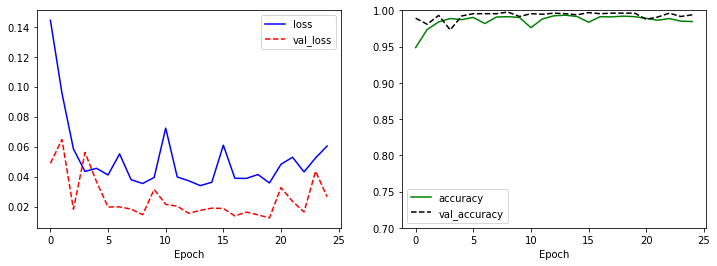

In [10]:
# [확인] 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [11]:
# (4) 분류 모델 평가
model.evaluate(test_X, test_Y)

# 정확도(accuracy)가 0.9931로 거의 오차 없이 레드와인와 화이트와인을 분류했다

41/41 [==============================] - 0s 791us/step - loss: 0.0564 - accuracy: 0.9900


[0.05636293813586235, 0.9900000095367432]

In [12]:
# (5) 주어진 자료로 레드와인인지 화이트 와인인지 감별
# 정답이 레드 와인(0.0)이라면 [1. 0.]이 되고 화이트 와인(1.0)이라면 [0. 1.]이 된다.

x_values = ([0.30578512, 0.29333333, 0.09638554, 0.01993865, 0.12624585, 0.03819444,
 0.06682028, 0.18681319, 0.51162791, 0.2247191,  0.2173913,  0.66666667],)
y_pred = model.predict(x_values)
y_pred  # 화이트와인

array([[7.679927e-12, 1.000000e+00]], dtype=float32)